In [1]:
import os
import glob
import sys
import numpy as np
import pandas as pd
import cv2
import progressbar
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage import filters, morphology, measure, color

sys.path.append('/Users/eorenstein/Software/ayeris-image-tools/')
from eyeris_img_proc import canny_proc, get_regions

Get a list of all the images in the directory

In [2]:
ptfs = glob.glob(os.path.join('*.jpg'))
len(ptfs)

0

List out the properties you want to find.

In [3]:
propz = ['area', 'bbox', 'centroid', 'equivalent_diameter', 'eccentricity', 'mean_intensity']

Process the images as needed or load in an existing csv file.

In [4]:
# procd = []
# for im in progressbar.progressbar(ptfs):
#     mm, gray = canny_proc(im)
#     df = get_regions(mm, gray, props = propz)
#     df['img_id'] = im.split('.jpg')[0][:-10]
#     procd.append(pd.DataFrame(df))

#df = pd.concat(procd, axis=0, ignore_index=True)

read particle data from file

In [5]:
df = pd.read_csv('all_push_core_particles.csv', index_col=[0])

### Make plots with no smoothing

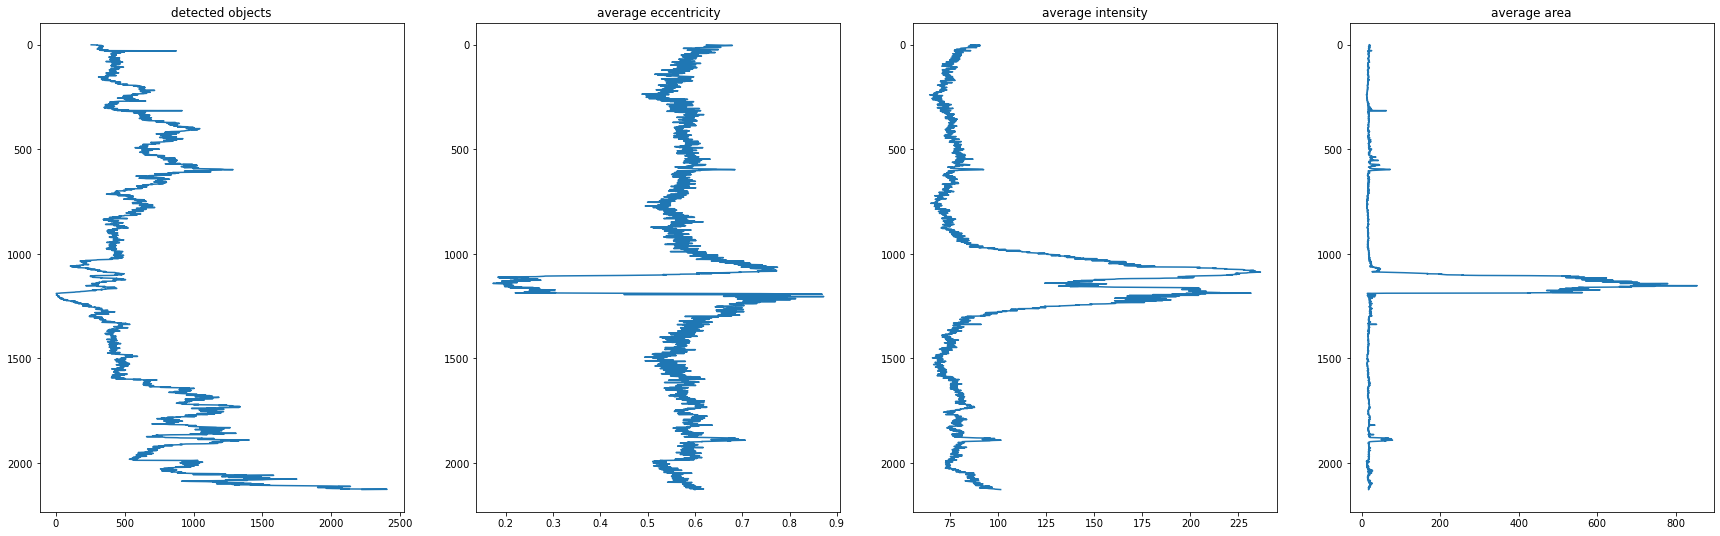

In [6]:
fig, ax = plt.subplots(1,4, figsize=(30,9))
cts = df.groupby('img_id').count()['area'].values  # number of objects per frame
ecc = df.groupby('img_id').mean()['eccentricity'].values  # average eccentricity of objects per frame
intsy = df.groupby('img_id').mean()['mean_intensity'].values  # average per frame of mean pixel intensity in each object 
area = df.groupby('img_id').mean()['area'].values  # average object are per frame

ax[0].plot(cts, np.arange(0, len(cts)))
ax[0].set_title('detected objects')
ax[0].invert_yaxis()

ax[1].plot(ecc, np.arange(0, len(ecc)))
ax[1].set_title('average eccentricity')
ax[1].invert_yaxis()

ax[2].plot(intsy, np.arange(0, len(intsy)))
ax[2].set_title('average intensity')
ax[2].invert_yaxis()

ax[3].plot(area, np.arange(0, len(area)))
ax[3].set_title('average area')
ax[3].invert_yaxis()


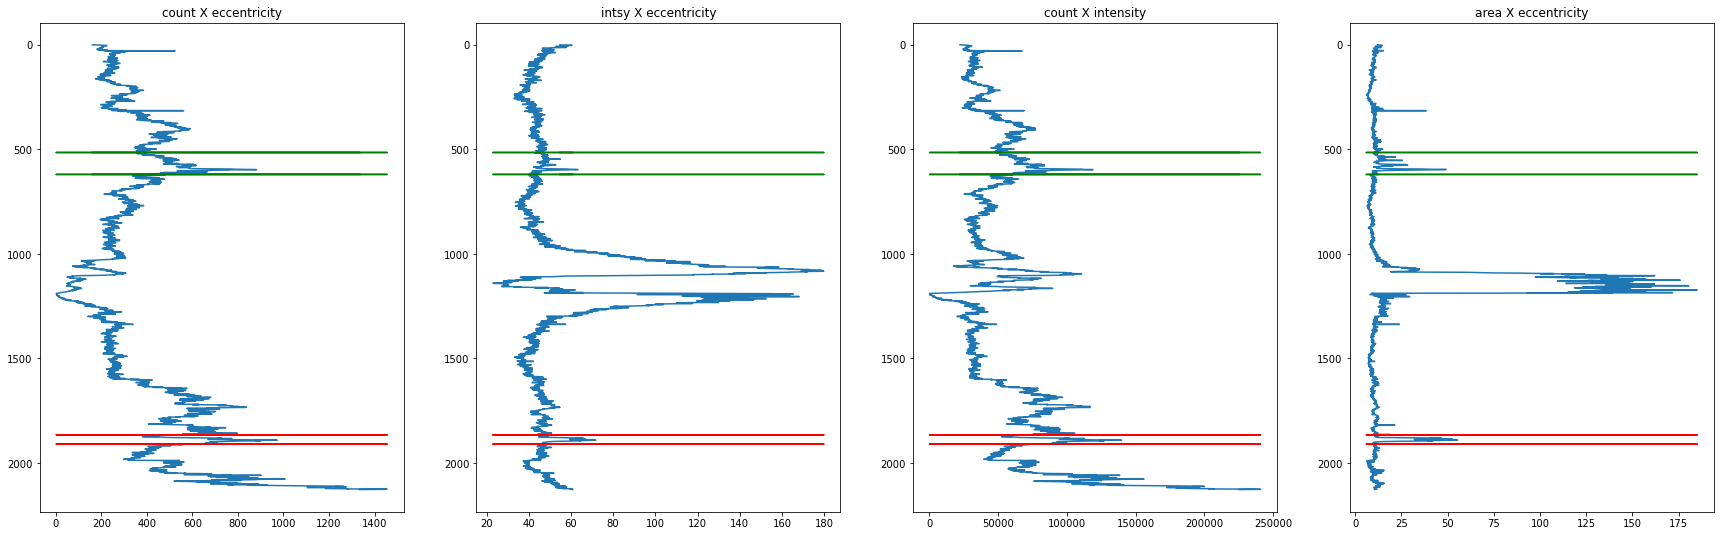

In [7]:
fig, ax = plt.subplots(1,4, figsize=(30,9))

# manually selected tops/bottoms of krill layers (with ~15 frames of buffer)
lay1top = np.ones([len(cts),])*515
lay1bot = np.ones([len(cts),])*620

lay2top = np.ones([len(cts),])*1865
lay2bot = np.ones([len(cts),])*1910

ax[0].plot(cts*ecc, np.arange(0, len(cts)))
ax[0].plot(cts*ecc, lay2top, 'r')
ax[0].plot(cts*ecc, lay2bot, 'r')
ax[0].plot(cts*ecc, lay1top, 'g')
ax[0].plot(cts*ecc, lay1bot, 'g')
ax[0].set_title('count X eccentricity')
ax[0].invert_yaxis()

ax[1].plot(intsy*ecc, np.arange(0, len(ecc)))
ax[1].plot(intsy*ecc, lay2top, 'r')
ax[1].plot(intsy*ecc, lay2bot, 'r')
ax[1].plot(intsy*ecc, lay1top, 'g')
ax[1].plot(intsy*ecc, lay1bot, 'g')
ax[1].set_title('intsy X eccentricity')
ax[1].invert_yaxis()

ax[2].plot(cts*intsy, np.arange(0, len(intsy)))
ax[2].plot(cts*intsy, lay2top, 'r')
ax[2].plot(cts*intsy, lay2bot, 'r')
ax[2].plot(cts*intsy, lay1top, 'g')
ax[2].plot(cts*intsy, lay1bot, 'g')
ax[2].set_title('count X intensity')
ax[2].invert_yaxis()

ax[3].plot(area*ecc, np.arange(0, len(intsy)))
ax[3].plot(area*ecc, lay2top, 'r')
ax[3].plot(area*ecc, lay2bot, 'r')
ax[3].plot(area*ecc, lay1top, 'g')
ax[3].plot(area*ecc, lay1bot, 'g')
ax[3].set_title('area X eccentricity')
ax[3].invert_yaxis()


### Plots with smoothing

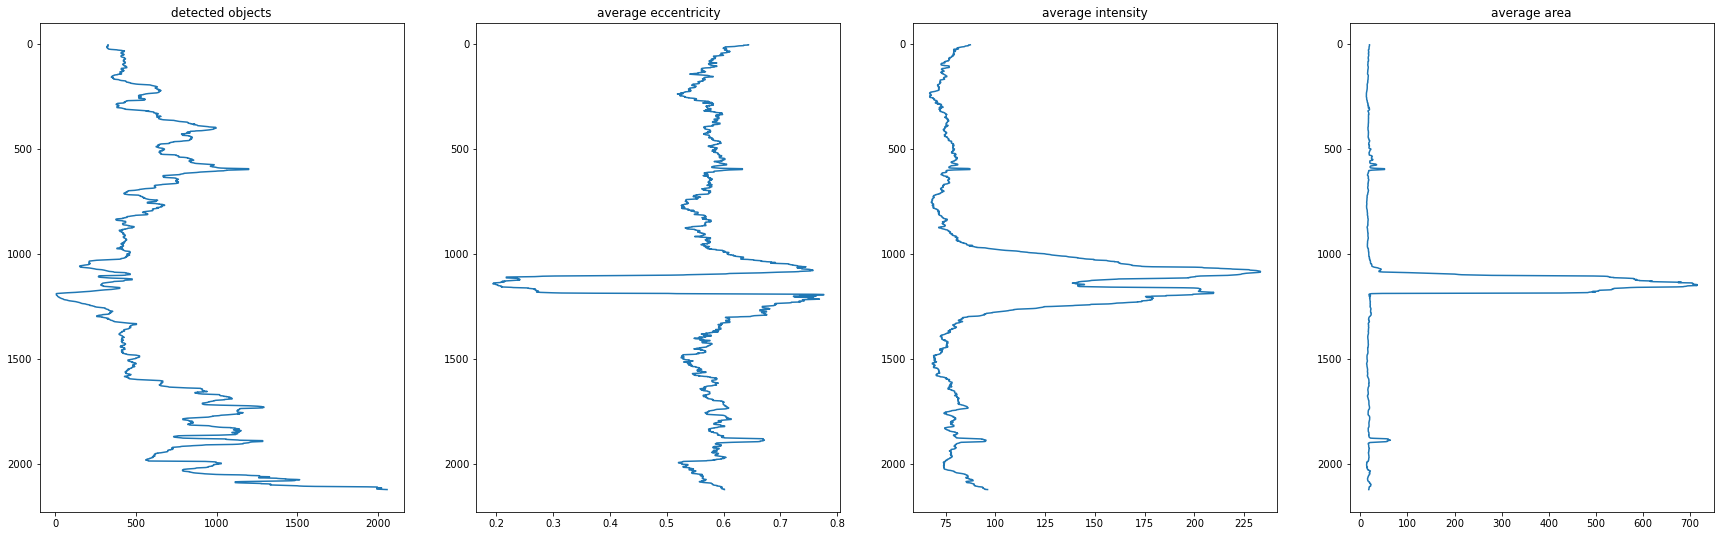

In [8]:
fig, ax = plt.subplots(1,4, figsize=(30,9))
cts = df.groupby('img_id').count()['area'].rolling(10, center=True).median().values  # number of objects per frame
ecc = df.groupby('img_id').mean()['eccentricity'].rolling(10, center=True).median().values  # average eccentricity of objects per frame
intsy = df.groupby('img_id').mean()['mean_intensity'].rolling(10, center=True).median().values  # average per frame of mean pixel intensity in each object 
area = df.groupby('img_id').mean()['area'].rolling(10, center=True).median().values  # average object are per frame

ax[0].plot(cts, np.arange(0, len(cts)))
ax[0].set_title('detected objects')
ax[0].invert_yaxis()

ax[1].plot(ecc, np.arange(0, len(ecc)))
ax[1].set_title('average eccentricity')
ax[1].invert_yaxis()

ax[2].plot(intsy, np.arange(0, len(intsy)))
ax[2].set_title('average intensity')
ax[2].invert_yaxis()

ax[3].plot(area, np.arange(0, len(area)))
ax[3].set_title('average area')
ax[3].invert_yaxis()


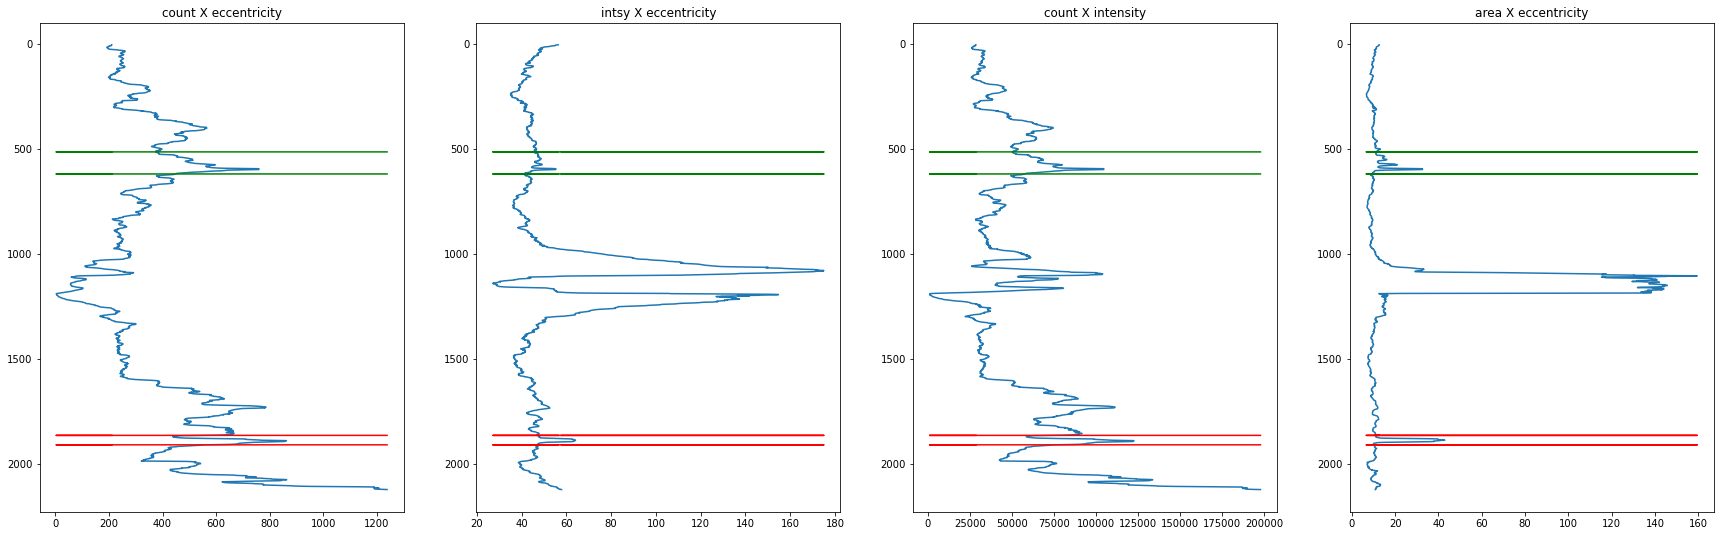

In [9]:
fig, ax = plt.subplots(1,4, figsize=(30,9))

# manually selected tops/bottoms of krill layers (with ~15 frames of buffer)
lay1top = np.ones([len(cts),])*515
lay1bot = np.ones([len(cts),])*620

lay2top = np.ones([len(cts),])*1865
lay2bot = np.ones([len(cts),])*1910

ax[0].plot(cts*ecc, np.arange(0, len(cts)))
ax[0].plot(cts*ecc, lay2top, 'r')
ax[0].plot(cts*ecc, lay2bot, 'r')
ax[0].plot(cts*ecc, lay1top, 'g')
ax[0].plot(cts*ecc, lay1bot, 'g')
ax[0].set_title('count X eccentricity')
ax[0].invert_yaxis()

ax[1].plot(intsy*ecc, np.arange(0, len(ecc)))
ax[1].plot(intsy*ecc, lay2top, 'r')
ax[1].plot(intsy*ecc, lay2bot, 'r')
ax[1].plot(intsy*ecc, lay1top, 'g')
ax[1].plot(intsy*ecc, lay1bot, 'g')
ax[1].set_title('intsy X eccentricity')
ax[1].invert_yaxis()

ax[2].plot(cts*intsy, np.arange(0, len(intsy)))
ax[2].plot(cts*intsy, lay2top, 'r')
ax[2].plot(cts*intsy, lay2bot, 'r')
ax[2].plot(cts*intsy, lay1top, 'g')
ax[2].plot(cts*intsy, lay1bot, 'g')
ax[2].set_title('count X intensity')
ax[2].invert_yaxis()

ax[3].plot(area*ecc, np.arange(0, len(intsy)))
ax[3].plot(area*ecc, lay2top, 'r')
ax[3].plot(area*ecc, lay2bot, 'r')
ax[3].plot(area*ecc, lay1top, 'g')
ax[3].plot(area*ecc, lay1bot, 'g')
ax[3].set_title('area X eccentricity')
ax[3].invert_yaxis()


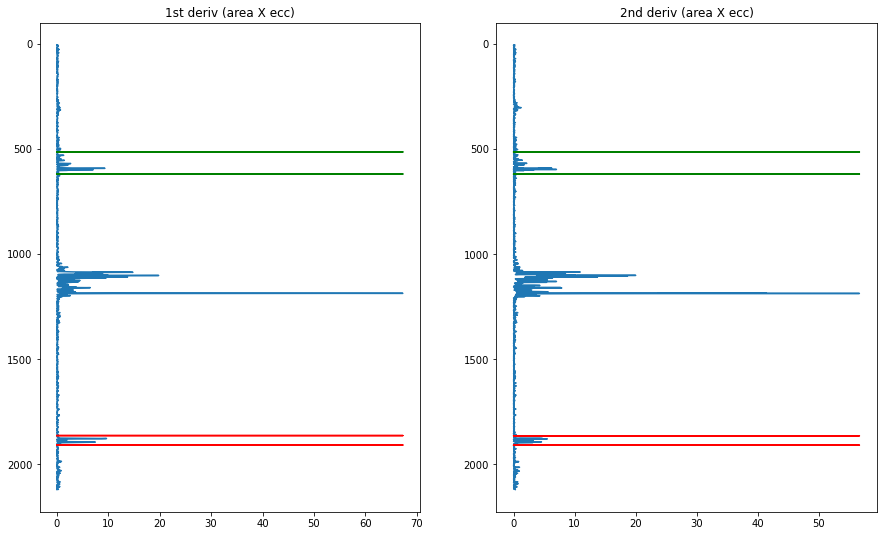

In [10]:
fig, ax = plt.subplots(1,2, figsize=(15,9))

der1 = np.abs(np.diff(ecc*area, n=1))
der2 = np.abs(np.diff(ecc*area, n=2))

ax[0].plot(der1, np.arange(0, der1.shape[0]))
ax[0].plot(der1, lay2top[:-1], 'r')
ax[0].plot(der1, lay2bot[:-1], 'r')
ax[0].plot(der1, lay1top[:-1], 'g')
ax[0].plot(der1, lay1bot[:-1], 'g')
ax[0].set_title('1st deriv (area X ecc)')
ax[0].invert_yaxis()

ax[1].plot(der2, np.arange(0, der2.shape[0]))
ax[1].plot(der2, lay2top[:-2], 'r')
ax[1].plot(der2, lay2bot[:-2], 'r')
ax[1].plot(der2, lay1top[:-2], 'g')
ax[1].plot(der2, lay1bot[:-2], 'g')
ax[1].set_title('2nd deriv (area X ecc)')
ax[1].invert_yaxis()

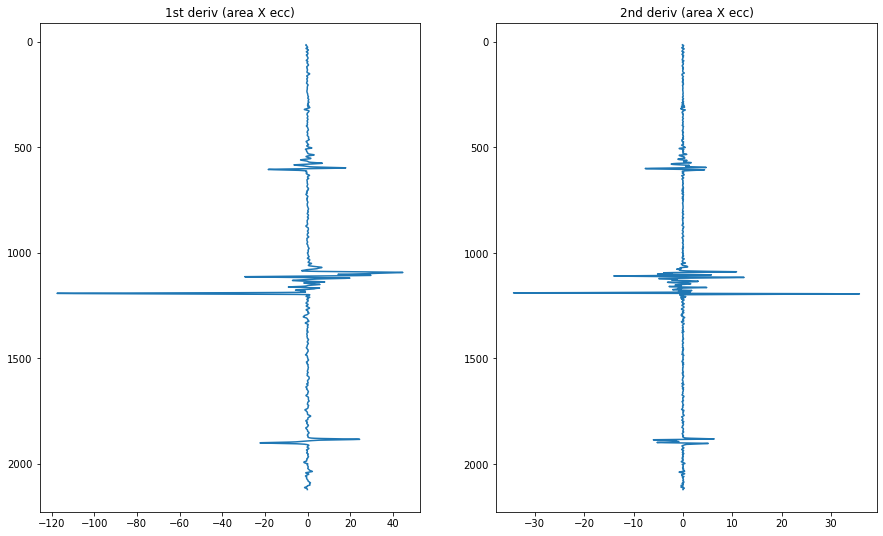

In [11]:
fig, ax = plt.subplots(1,2, figsize=(15,9))

der1 = np.convolve(np.diff(ecc*area, n=1), np.hamming(10))
der2 = np.convolve(np.diff(ecc*area, n=2), np.hamming(10))

ax[0].plot(der1, np.arange(0, der1.shape[0]))
ax[0].set_title('1st deriv (area X ecc)')
ax[0].invert_yaxis()

ax[1].plot(der2, np.arange(0, der2.shape[0]))
ax[1].set_title('2nd deriv (area X ecc)')
ax[1].invert_yaxis()

In [12]:
len(der1)

2136

In [13]:
ptfs.sort()

xx = ['2022-05-26-21-38-32.924952211-001989-DS.jpg',
'2022-05-26-21-38-56.976288516-002013-DS.jpg']

flag = 0
for ii in ptfs:
    if ii == xx[0] or ii == xx[1]:
        print(flag)
    flag += 1

In [14]:
xx=['2022-05-26-21-15-49.096507331-000638-DS.jpg',
'2022-05-26-21-17-07.270825739-000716-DS.jpg']

flag = 0
for ii in ptfs:
    if ii == xx[0] or ii == xx[1]:
        print(flag)
    flag += 1